In [2]:
import numpy as np

def quantity_adjustment_costs(y, typical_supplies, Gamma):
    euclidian_norm = np.linalg.norm(y - typical_supplies)
    return -Gamma * euclidian_norm ** 2

def generate_data(n, m, S, D):
    groups = [np.random.choice(n, np.random.randint(1, n // 2), replace=False) for _ in range(m)]

    suppliers = []
    for _ in range(S):
        # y_hat
        typical_supplies = np.random.uniform(0.01, 2, size=n)

        Gamma = np.random.uniform(1e-6, 1e-3)

        cost_function = lambda y: np.linalg.norm(y) ** 2

        suppliers.append({
            'typical_supplies': typical_supplies,
            'Gamma': Gamma,
            'cost_function': cost_function,
        })

    A = np.random.uniform(0.01, 1, size=(n, D))  # Consumer preference matrix
    mu_values = np.random.uniform(0.1, 1, size=m)  # Correlation parameters

    return groups, suppliers, A, mu_values

def y_s(p, typical_supplies, Gamma):
    return (p + 2 * Gamma * typical_supplies) / (2 + 2 * Gamma)

def x_d(p, A, mu_values, groups, d):
    for j, group in enumerate(groups):
        for product_idx in group:
            expp = np.exp((A[product_idx, d] - p[product_idx]) / mu_values[j])
            expp2 = 0
            for k in group:
                expp2 += np.exp(A[k, d] - p[k] / mu_values[j])
            expp2 = np.power(expp2, mu_values[j]-1)
            expp3 = 0
            for h, group2 in enumerate(groups):
                for k in group2:
                    expp3 += np.exp(A[k, d] - p[k] / mu_values[h])
                expp3 = np.power(expp3, mu_values[h])
    return expp * expp2 / expp3

n = 20  # Number of product alternatives
m = 5   # Number of groups
S = 5   # Number of suppliers
D = 10  # Number of consumers

groups, suppliers, A, mu_values = generate_data(n, m, S, D)

p_initial = np.random.uniform(0.01, 5, size=n)
p_initial = p_initial / np.max(p_initial)

N = np.random.randint(1, 10, D)  # Random N values for consumers
beta = np.random.uniform(0.1, 1, D)  # Random beta values for consumers

sum_N_over_beta = np.sum(N / beta)
sum_1_over_Gamma = np.sum([1 / supplier['Gamma'] for supplier in suppliers])

h = 1 / (sum_N_over_beta + sum_1_over_Gamma)

In [15]:
def update_prices(p, h, suppliers, A, N, beta, mu_values, groups):
    K = len(suppliers)
    J = A.shape[1] # number of consumers
    sum_y = np.sum([y_s(p, suppliers[k]['typical_supplies'], suppliers[k]['Gamma']) for k in range(K)], axis=0)
    sum_x = np.sum([N[j] * x_d(p, A, mu_values, groups, j) for j in range(J)], axis=0)
    p_new = p - h * (sum_y - sum_x)
    return np.maximum(p_new, 0)

T = 1000
prices_over_time = np.zeros((T + 1, n))
prices_over_time[0] = p_initial

for t in range(T):
    prices_over_time[t + 1] = update_prices(prices_over_time[t], h, suppliers, A, N, beta, mu_values, groups)

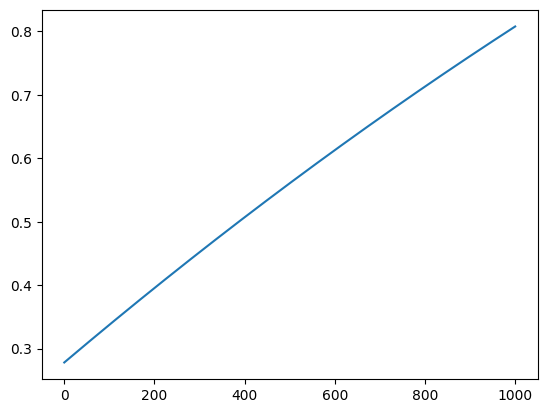

In [21]:
import matplotlib.pyplot as plt

plt.plot(prices_over_time.T[5])
plt.show()

In [20]:
print(np.all(np.diff(prices_over_time.T[5]) >= 0))

True


In [24]:
np.diff(prices_over_time.T[5]) # not linear

array([0.00060118, 0.00060103, 0.00060089, 0.00060074, 0.00060059,
       0.00060044, 0.0006003 , 0.00060015, 0.0006    , 0.00059986,
       0.00059971, 0.00059956, 0.00059942, 0.00059927, 0.00059912,
       0.00059897, 0.00059883, 0.00059868, 0.00059853, 0.00059839,
       0.00059824, 0.00059809, 0.00059795, 0.0005978 , 0.00059765,
       0.00059751, 0.00059736, 0.00059721, 0.00059706, 0.00059692,
       0.00059677, 0.00059662, 0.00059648, 0.00059633, 0.00059618,
       0.00059604, 0.00059589, 0.00059574, 0.0005956 , 0.00059545,
       0.0005953 , 0.00059516, 0.00059501, 0.00059486, 0.00059472,
       0.00059457, 0.00059442, 0.00059428, 0.00059413, 0.00059398,
       0.00059384, 0.00059369, 0.00059354, 0.0005934 , 0.00059325,
       0.0005931 , 0.00059296, 0.00059281, 0.00059266, 0.00059252,
       0.00059237, 0.00059222, 0.00059208, 0.00059193, 0.00059178,
       0.00059164, 0.00059149, 0.00059134, 0.0005912 , 0.00059105,
       0.00059091, 0.00059076, 0.00059061, 0.00059047, 0.00059